In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
#import
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, recall_score
from sklearn.tree import plot_tree

In [3]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
#import customized functions
from src.data_cleaning import cleaning_functions as cfs
from src.data_cleaning import exploration_functions as efs
from src.data_cleaning import processing_functions as pfs
from src.data_cleaning import useful_viz 

In [5]:
X_train, X_test, y_train, y_test, classes_dict = pfs.processed_dataset()

In [6]:
X_train, encoders = pfs.ohe_all_categorical_features(X_train)

In [7]:
X_train.shape

(44550, 278)

Starting off with a simple Decision Tree and then working my way towards Ensemble Methods

In [12]:
def show_tree(model,test_or_train,):
    """This will plot the decision tree for your designated decision tree model need to fix this later so it does not show the extra text"""
    plt.figure(figsize=(25,10))
    p=plot_tree(model,feature_names=test_or_train.columns,filled=True,rounded=True, max_depth=3,fontsize=14)
    return p

In [14]:
dt = DecisionTreeClassifier(random_state=2020, class_weight='balanced')
model1 = dt.fit(X_train, y_train)
confusion_matrix(y_train, model1.predict(X_train))

array([[24085,   149,    15],
       [    4,  3161,     0],
       [    5,    15, 17116]], dtype=int64)

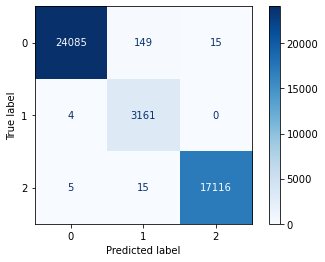

In [10]:
plot_confusion_matrix(model1, X_train, y_train, cmap='Blues', values_format='d');

In [10]:
#recall_score()

Beautifully overfitted model, close to perfection!
let's look closely with cross validation first 

In [11]:
from  sklearn.tree import plot_tree

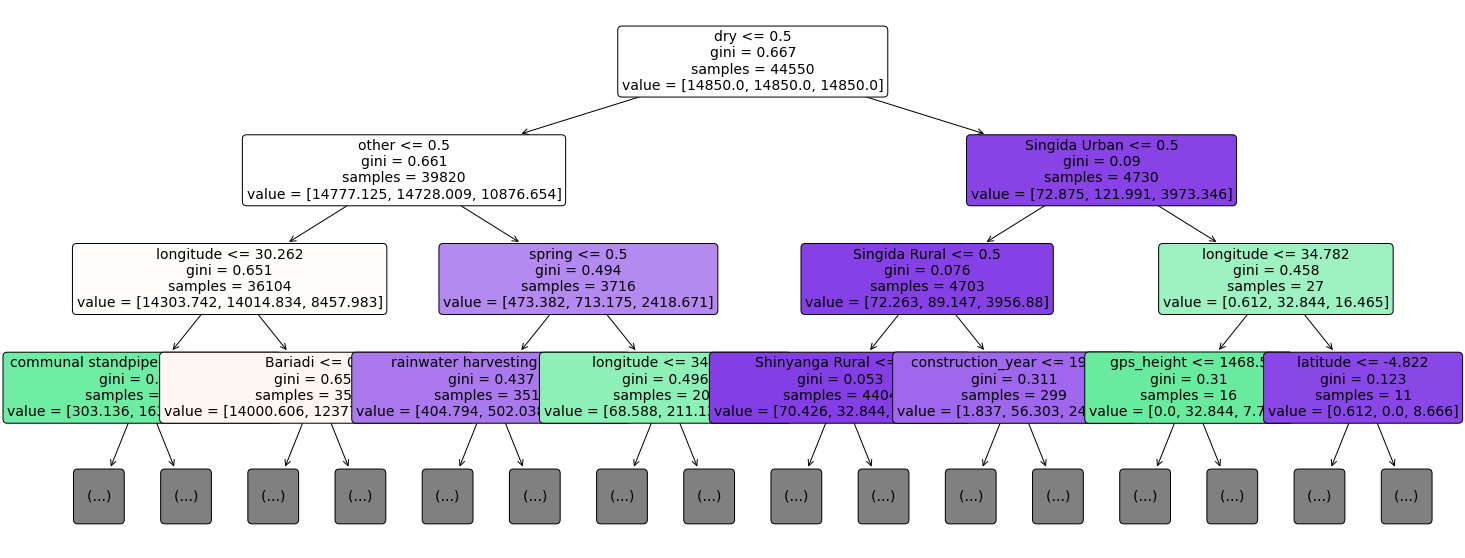

In [20]:
show_tree(dt,X_train);

C:\Users\jstep\anaconda3\envs\Tanzania\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass max_depth=Index(['gps_height', 'longitude', 'latitude', 'population',
       'construction_year', 'Internal', 'Lake Nyasa', 'Lake Rukwa',
       'Lake Tanganyika', 'Lake Victoria',
       ...
       '5', '53', '6', '60', '62', '63', '67', '7', '8', '80'],
      dtype='object', length=278) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


TypeError: '>=' not supported between instances of 'str' and 'int'

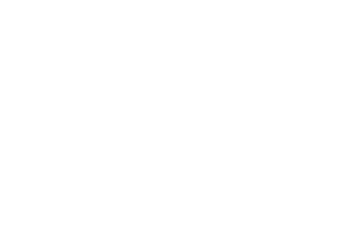

In [19]:
plot_tree(dt,X_train.columns, max_depth=3);
